<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет-трафик" data-toc-modified-id="Интернет-трафик-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Интернет трафик</a></span></li><li><span><a href="#Абоненты" data-toc-modified-id="Абоненты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Абоненты</a></span></li></ul></li><li><span><a href="#Расчёты" data-toc-modified-id="Расчёты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Звонки</a></span></li><li><span><a href="#Интернет" data-toc-modified-id="Интернет-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Интернет</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Финальная-таблица" data-toc-modified-id="Финальная-таблица-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Финальная таблица</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Тариф-&quot;Smart&quot;" data-toc-modified-id="Тариф-&quot;Smart&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тариф "Smart"</a></span></li><li><span><a href="#Тариф-Ultra" data-toc-modified-id="Тариф-Ultra-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Тариф Ultra</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2." data-toc-modified-id="Гипотеза-№2.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза №2.</a></span></li><li><span><a href="#Дополнительные-расчёты" data-toc-modified-id="Дополнительные-расчёты-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Дополнительные расчёты</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».

Задача заказчика: Необходимо скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Выполнено: Предварительный анализ тарифов на небольшой выборке клиентов (500 абонентов).

Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

In [4]:
try:
    calls = pd.read_csv("data/calls.csv")
    internet = pd.read_csv("data/internet.csv")
    messages = pd.read_csv("data/messages.csv")
    tariffs = pd.read_csv("data/tariffs.csv")
    users = pd.read_csv("data/users.csv")
except FileNotFoundError:
    calls = pd.read_csv("/datasets/calls.csv")
    internet = pd.read_csv("/datasets/internet.csv")
    messages = pd.read_csv("/datasets/messages.csv")
    tariffs = pd.read_csv("/datasets/tariffs.csv")
    users = pd.read_csv("/datasets/users.csv")

In [5]:
#Информация по голосовым сервисам
calls.info()
print()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Длина таблицы со звоками 202607 - пропусков нет. Сводная информация по звонкам каждого абонента.

In [6]:
#Информация по использованию услуги Интернет
internet.info()
print()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Длина таблицы со звоками 149396 - пропусков нет. Сводная информация объему трафика и дате выхода в сеть интрнет каждого абонента.

In [7]:
#Информация по использованию услуги текстовых сообщений
messages.info()
print()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Длина таблицы со звоками 123036 - пропусков нет. Сводная информация по факту отправки текстовых сообщений каждого абонента.

In [8]:
#Информация по имеющимся у абонентов тарифам
tariffs.info()
print()
tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание тарифных планов

In [9]:
#Информация по абонентам
users.info()
print()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Для анализа предоставлено 500 абонентов, в churn_date 38 записей, 38 абонентов прекратили использование тарифными планами, остальные 462 пользуются услугами тарифных планов.

### Вывод

Имеем в наличии 5 датасетов 4 из них имеют общий столбец user_id. Датасеты users и tariffs связаны между собой названием тарифа.

## Предобработка данных

### Звонки

In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


call_date необходимо изменить тип object на date_time
duration - длительность необходимо округлить в потолок и привести к целочисленному виду.

По звонкам, будем считать что все звонки исходящие, а нулевые значения - как недозвон, потому что пропущенные значения это уже входящий трафик.

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = (np.ceil(calls['duration'])).astype('int')

In [12]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Сделали все необходимое переходим к следующему сервису.

### Сообщения

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Приведем дату отправки сообщения в соответствующий формат

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Сделали все необходимое переходим к следующему сервису.

### Интернет трафик

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Использованный трафик округлим в потолок до целых значений (так делают операторы), приведём к целочисленному типу. 
Дате сессии подарим datetime.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['mb_used'] = (np.ceil(internet['mb_used'])).astype('int')


In [17]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int32         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.1+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


Сделали все необходимое переходим к следующей части.

### Абоненты

In [18]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


reg_date и churn_date - переведём в datetime.

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [20]:
users[users['churn_date'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart


In [21]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Всего у нас 500 абонентов из них 351 - пользуется тарифом Smart, 149 - Ultra.

## Расчёты

Посчитайте для каждого пользователя:

•	количество сделанных звонков и израсходованных минут разговора по месяцам;

•	количество отправленных сообщений по месяцам;

•	объем израсходованного интернет-трафика по месяцам;

•	помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


### Звонки

In [22]:
calls['duration'].describe() # по звонкам все в порядке

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Будем производить расчёты

In [23]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


Количество звонков и их общая длительность, каждого пользователя с группировкой по месяцам.

In [24]:
calls_count_sum = calls.pivot_table(index=['user_id', calls['call_date'].dt.month.rename('month')],
                              values=['duration'], aggfunc=['count', 'sum']
                               )
calls_count_sum.set_axis(['count_calls', 'sum_duration'], axis='columns', inplace=True)
calls_count_sum.head(10)

count_calls  sum_duration
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
        10              57           350
        11              43           338
        12              46           333
1001    11              59           430
        12              63           414

### Интернет

In [25]:
internet.describe()
internet[(internet['user_id'] == 1001)].sort_values(by='session_date').head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
252,252,1001_41,521,2018-11-01,1001
303,303,1001_92,0,2018-11-02,1001
296,296,1001_85,494,2018-11-03,1001
256,256,1001_45,861,2018-11-04,1001
290,290,1001_79,726,2018-11-04,1001
247,247,1001_36,519,2018-11-04,1001
224,224,1001_13,227,2018-11-04,1001
295,295,1001_84,746,2018-11-06,1001
282,282,1001_71,187,2018-11-07,1001
223,223,1001_12,815,2018-11-07,1001


В интернет сессиях существуют нулевые значения, примем это не за ошибку, а за факт включения интернета на телефоне. У операторов существует не тарифицируемый порог в 150 - 400 кб.

In [26]:
# Произведём расчёт объёма израсходованного трафика каждого абонента по месяцам, переведём Мб в Гб.
internet_sum_value = internet.pivot_table(index=['user_id', internet['session_date'].dt.month.rename('month')],
                              values=['mb_used'], aggfunc=['sum']
                               )
internet_sum_value.set_axis(['sum_value_inet_traffic_Gb'], axis='columns', inplace=True)
internet_sum_value['sum_value_inet_traffic_Gb'] = (np.ceil(internet_sum_value['sum_value_inet_traffic_Gb'] / 1024)).astype('int')
internet_sum_value


sum_value_inet_traffic_Gb
user_id month                           
1000    5                              3
        6                             23
        7                             14
        8                             14
        9                             15
...                                  ...
1498    10                            21
1499    9                              2
        10                            18
        11                            18
        12                            13

[3203 rows x 1 columns]

Произведён рассчёт потребляемого трафика по месяцам, определённым абонентом.

### Сообщения

In [27]:
messages_sum_value = messages.pivot_table(index=['user_id', messages['message_date'].dt.month.rename('month')],
                              values=['id'], aggfunc=['count']
                               )
messages_sum_value.set_axis(['sum_value_messages'], axis='columns', inplace=True)
messages_sum_value

sum_value_messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

### Финальная таблица

Создадим общую таблицу для анализа потребностей абонентов

In [28]:
fin_df = calls_count_sum.merge(
    messages_sum_value.merge(internet_sum_value, on=['user_id', 'month'], how='outer'),
    on=['user_id', 'month'],
    how='outer'
)
fin_df = fin_df.reset_index(level=['month'])
fin_df

,month,count_calls,sum_duration,sum_value_messages,sum_value_inet_traffic_Gb
user_id,,,,,
1000,5,22.0,159.0,22.0,3.0
1000,6,43.0,172.0,60.0,23.0
1000,7,47.0,340.0,75.0,14.0
1000,8,52.0,408.0,81.0,14.0
1000,9,58.0,466.0,57.0,15.0
...,...,...,...,...,...
1489,9,NaN,NaN,32.0,17.0
1489,10,NaN,NaN,21.0,20.0
1489,11,NaN,NaN,20.0,18.0


In [29]:
fin_df.isna().sum()

month                          0
count_calls                   40
sum_duration                  40
sum_value_messages           497
sum_value_inet_traffic_Gb     11
dtype: int64

Нет данных по сообщениям и использованию интернет трафика. Заменим пропуски нулями.

In [30]:
fin_df = fin_df.fillna(value=0)
fin_df['sum_value_inet_traffic_Gb'] = fin_df['sum_value_inet_traffic_Gb'].astype('int')
fin_df['sum_value_messages'] = fin_df['sum_value_messages'].astype('int')

In [31]:
fin_df.isna().sum()

month                        0
count_calls                  0
sum_duration                 0
sum_value_messages           0
sum_value_inet_traffic_Gb    0
dtype: int64

Произведём слияние таблиц по индексам user_id и month, данные по голосовой связи, сообщениям и интернет трафику.

In [32]:
fin_df = fin_df.merge(users[['user_id', 'city', 'tariff']], on='user_id')

Создадим итоговый датафрейм для анализа, подтянем данные из таблицы users.

In [33]:
fin_df

,user_id,month,count_calls,sum_duration,sum_value_messages,sum_value_inet_traffic_Gb,city,tariff
0,1000,5,22.0,159.0,22,3,Краснодар,ultra
1,1000,6,43.0,172.0,60,23,Краснодар,ultra
2,1000,7,47.0,340.0,75,14,Краснодар,ultra
3,1000,8,52.0,408.0,81,14,Краснодар,ultra
4,1000,9,58.0,466.0,57,15,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17,11,Санкт-Петербург,smart
3210,1489,9,0.0,0.0,32,17,Санкт-Петербург,smart
3211,1489,10,0.0,0.0,21,20,Санкт-Петербург,smart
3212,1489,11,0.0,0.0,20,18,Санкт-Петербург,smart


In [34]:
tariffs = tariffs.pivot_table(index='tariff_name')

In [35]:
fin_df = fin_df.join(tariffs, on='tariff')
fin_df

,user_id,month,count_calls,sum_duration,sum_value_messages,sum_value_inet_traffic_Gb,city,tariff,mb_per_month_included,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22,3,Краснодар,ultra,30720,1000,3000,1950,150,1,1
1,1000,6,43.0,172.0,60,23,Краснодар,ultra,30720,1000,3000,1950,150,1,1
2,1000,7,47.0,340.0,75,14,Краснодар,ultra,30720,1000,3000,1950,150,1,1
3,1000,8,52.0,408.0,81,14,Краснодар,ultra,30720,1000,3000,1950,150,1,1
4,1000,9,58.0,466.0,57,15,Краснодар,ultra,30720,1000,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17,11,Санкт-Петербург,smart,15360,50,500,550,200,3,3
3210,1489,9,0.0,0.0,32,17,Санкт-Петербург,smart,15360,50,500,550,200,3,3
3211,1489,10,0.0,0.0,21,20,Санкт-Петербург,smart,15360,50,500,550,200,3,3
3212,1489,11,0.0,0.0,20,18,Санкт-Петербург,smart,15360,50,500,550,200,3,3


Добавим расшифровку тарифов

In [36]:
fin_df['mb_per_month_included'] = (fin_df['mb_per_month_included'] / 1024).astype('int')

Переведём предоплаченный трафик в Gb. Тип целочисленный.

In [37]:
fin_df.rename(columns={'mb_per_month_included': 'Gb_per_month_included'}, inplace=True)

Переименуем столбец в соответствии с изменениями. Мб изменим на Гб чтобы не было путаницы.

Функция для расчёта выручки

In [38]:
def revenue(row):
    rev_min, rev_sms, rev_inet = 0, 0, 0
    #min
    if (row['sum_duration'] - row['minutes_included']) > 0:
        rev_min = (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
    #SMS
    if (row['sum_value_messages'] - row['messages_included']) > 0:
        rev_sms = (row['sum_value_messages'] - row['messages_included']) * row['rub_per_message']
    #inet
    if (row['sum_value_inet_traffic_Gb'] - row['Gb_per_month_included']) > 0:
        rev_inet = (row['sum_value_inet_traffic_Gb'] - row['Gb_per_month_included']) * row['rub_per_gb']
            
    return rev_min + rev_sms + rev_inet + row['rub_monthly_fee']
    
   

In [39]:
fin_df['revenue_rub'] = fin_df.apply(revenue, axis=1)

Новый столбец с выручкой в рублях.

In [40]:
fin_df

,user_id,month,count_calls,sum_duration,sum_value_messages,sum_value_inet_traffic_Gb,city,tariff,Gb_per_month_included,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_rub
0,1000,5,22.0,159.0,22,3,Краснодар,ultra,30,1000,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60,23,Краснодар,ultra,30,1000,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75,14,Краснодар,ultra,30,1000,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81,14,Краснодар,ultra,30,1000,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57,15,Краснодар,ultra,30,1000,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17,11,Санкт-Петербург,smart,15,50,500,550,200,3,3,550.0
3210,1489,9,0.0,0.0,32,17,Санкт-Петербург,smart,15,50,500,550,200,3,3,950.0
3211,1489,10,0.0,0.0,21,20,Санкт-Петербург,smart,15,50,500,550,200,3,3,1550.0
3212,1489,11,0.0,0.0,20,18,Санкт-Петербург,smart,15,50,500,550,200,3,3,1150.0


Создали итогую таблицу для анализа данных, даже из демонстрационной части датафрейма видно, что кому то пора менять тариф.
Рассмотрим данные внимательнее.

## Исследовательский анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Тариф "Smart"

Как считали ранее:
    
Всего у нас 500 абонентов из них 351 - пользуется тарифом Smart, 149 - Ultra.

In [41]:
users_smart = fin_df[fin_df['tariff'] == 'smart']
users_smart['sum_duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: sum_duration, dtype: float64

In [42]:
users_smart

,user_id,month,count_calls,sum_duration,sum_value_messages,sum_value_inet_traffic_Gb,city,tariff,Gb_per_month_included,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_rub
8,1001,11,59.0,430.0,0,19,Москва,smart,15,50,500,550,200,3,3,1350.0
9,1001,12,63.0,414.0,0,14,Москва,smart,15,50,500,550,200,3,3,550.0
10,1002,6,15.0,117.0,4,11,Стерлитамак,smart,15,50,500,550,200,3,3,550.0
11,1002,7,26.0,214.0,11,18,Стерлитамак,smart,15,50,500,550,200,3,3,1150.0
12,1002,8,42.0,289.0,13,20,Стерлитамак,smart,15,50,500,550,200,3,3,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17,11,Санкт-Петербург,smart,15,50,500,550,200,3,3,550.0
3210,1489,9,0.0,0.0,32,17,Санкт-Петербург,smart,15,50,500,550,200,3,3,950.0
3211,1489,10,0.0,0.0,21,20,Санкт-Петербург,smart,15,50,500,550,200,3,3,1550.0
3212,1489,11,0.0,0.0,20,18,Санкт-Петербург,smart,15,50,500,550,200,3,3,1150.0


По числовому описанию, у абонентов или абонента данного тарифа был месяц в котором лимит разговоров превышен почти в 3 раза.
По среднему и медиане, большинство абонентов укладываются в предоставляемый им лимит.

In [43]:
def var_tariff(users_tariff):
    numeric_col = ['sum_duration', 'sum_value_messages', 'sum_value_inet_traffic_Gb']
    for col in numeric_col:
        sns.boxplot(users_tariff[col])
        plt.title('Диаграмма размаха для ' + col)
        plt.show()
    
        # расчёт выбросов по квартилям
        q75,q25 = np.percentile(users_tariff.loc[:,col],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
    
        print('Все что ниже', min, 'Все что выше', max, '- является выбросом, по определению (справочные данные)')
        print('Медиана = ', users_tariff[col].median())
        print('Среднее = ', users_tariff[col].mean())
    
        #дисперсия
        print(f'Дисперсия {col} = ', np.var(users_tariff[col], ddof=1))
    
        # Стандартное отклонение
        print(f'Стандартное отклонение {col} = ', np.std(users_tariff[col], ddof=1))
    
        sns.histplot(users_tariff[col],bins=20)
        plt.title('Гистограмма частотности ' + col)
        plt.show()
    
        users_tariff[col].plot.kde()
        plt.title('Гистограмма плотности ' + col)
        plt.show()
    
        # оценим количество абонентов за пределами 1 и 3 квартилей по каждому показателю.
        print('Количество записей за пределами 1 и 3 квартилей')
        print(len(users_tariff[(users_tariff[col] <= min) | (users_tariff[col] >= max)]))
    
        print(users_tariff[(users_tariff[col] <= min) | (users_tariff[col] >= max)]
              [['user_id','month', col]])
    
    

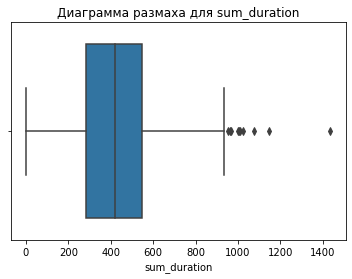

Все что ниже -112.5 Все что выше 939.5 - является выбросом, по определению (справочные данные)
Медиана =  422.0
Среднее =  417.9349484073576
Дисперсия sum_duration =  36219.315784344246
Стандартное отклонение sum_duration =  190.3137298892128


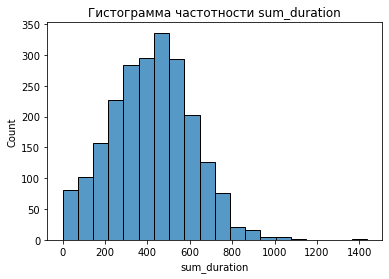

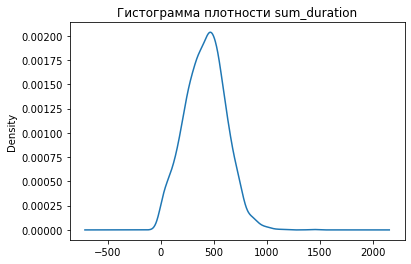

Количество записей за пределами 1 и 3 квартилей
10
      user_id  month  sum_duration
1078     1173      8        1000.0
1359     1216     12        1435.0
1452     1229     12        1022.0
1622     1261     12        1074.0
1961     1313     12         964.0
1998     1319     10        1005.0
2824     1443     10         965.0
2856     1451     12        1144.0
2932     1460     11         954.0
3108     1486     12        1007.0


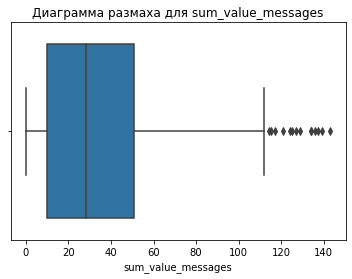

Все что ниже -51.5 Все что выше 112.5 - является выбросом, по определению (справочные данные)
Медиана =  28.0
Среднее =  33.384028712427096
Дисперсия sum_value_messages =  796.8129584480083
Стандартное отклонение sum_value_messages =  28.22787555676141


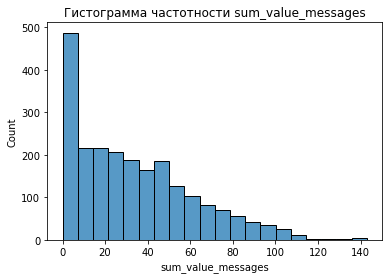

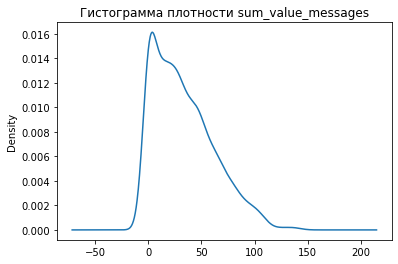

Количество записей за пределами 1 и 3 квартилей
14
      user_id  month  sum_value_messages
695      1112     12                 143
1341     1212     12                 129
1785     1285      6                 117
1788     1285      9                 114
1853     1295     12                 115
2026     1324      6                 134
2027     1324      7                 137
2028     1324      8                 134
2029     1324      9                 136
2030     1324     10                 139
2031     1324     11                 124
2032     1324     12                 125
3102     1484     10                 127
3103     1484     11                 121


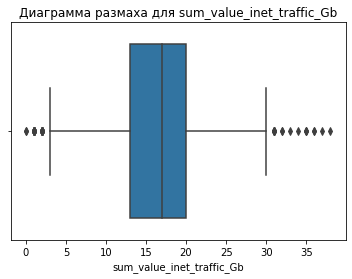

Все что ниже 2.5 Все что выше 30.5 - является выбросом, по определению (справочные данные)
Медиана =  17.0
Среднее =  16.35935397039031
Дисперсия sum_value_inet_traffic_Gb =  33.16030407078875
Стандартное отклонение sum_value_inet_traffic_Gb =  5.758498421532192


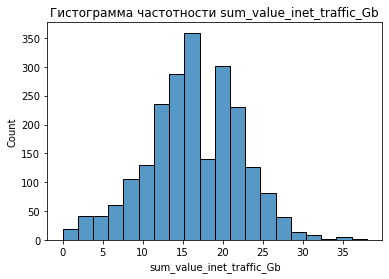

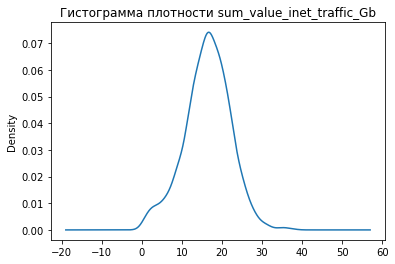

Количество записей за пределами 1 и 3 квартилей
53
      user_id  month  sum_value_inet_traffic_Gb
42       1006      2                          2
108      1015      4                          1
260      1042     12                         37
292      1047     10                          2
315      1051      5                          2
423      1066      8                         31
577      1093      6                          1
611      1098      8                         31
615      1098     12                         36
659      1105      9                          1
696      1113      1                          1
708      1114      7                          2
714      1115      7                          1
840      1135      1                          2
853      1136     12                         31
884      1144      4                          1
1000     1159     12                         35
1069     1172      6                         34
1073     1172     10                 

In [44]:
var_tariff(users_smart)

In [45]:
# Количество абонентов выходящих за пределы 1 и 3 квартилей по интернет трафику
users_smart[(users_smart['sum_value_inet_traffic_Gb'] <= 2.5) | (users_smart['sum_value_inet_traffic_Gb'] >= 30.5)]['user_id'].value_counts().count()

44

In [46]:
len(users_smart[users_smart['sum_value_messages'] == 0]['user_id'].unique())

62

Точно можно сказать, что клиенты очень разнородные, об этом говорит стандартное отклонение.

Пройдёмся по показателям:
1) Звонки
 - Среднестатистический абонент тарифа Smart использует 421 минуту разговора из 500
 - Данные имеют нормальное распределение
 - Незначительная скошенность влево
 - По данному показателю, только 10 абонентов выходят за пределы 1 и 3 квартилей
 - Разные абоненты и только в одном месяце, преобладает декабрь (аномальный месяц, нужно всех поздравить с Наступающим)
 
2) Текстовые сообщения
 - Среднестатистический абонент тарифа Smart использует 34 сообщений из 50
 - Данные имеют распределение Пуассона, скорее всего из-за того что это выборка
 - 6 абонентам стоит поискать или дополнительную услугу или новый тариф
 - 62 абонента не пользуются смс сообщениями - 307 записей.
 
3) Интернет трафик
 - Среднестатистический абонент тарифа Smart превышает предоплаченный трафик на 2 Гб
 - Данные имеют нормальное распределение
 - Незначительная скошенность влево
 - По данному показателю, 34 абонента выходят за пределы 1 и 3 квартилей !!!(обновлённые данные 44)
 - Этим абонентам стоит поискать или дополнительную услугу или новый тариф

### Тариф Ultra

Как считали ранее:
    
Всего у нас 500 абонентов из них 149 - пользуется тарифом Ultra.

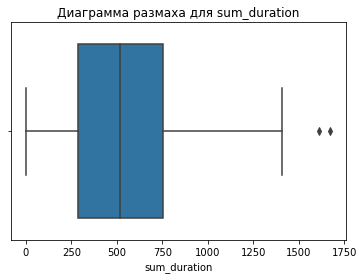

Все что ниже -418.0 Все что выше 1454.0 - является выбросом, по определению (справочные данные)
Медиана =  518.0
Среднее =  526.6233502538071
Дисперсия sum_duration =  100873.63339730089
Стандартное отклонение sum_duration =  317.60609785912624


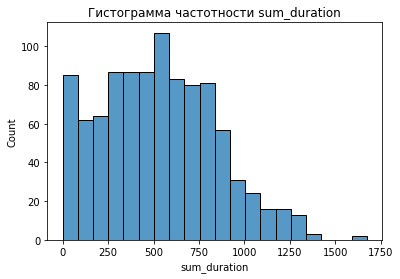

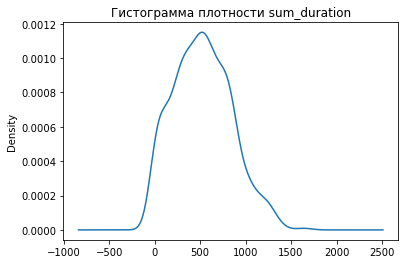

Количество записей за пределами 1 и 3 квартилей
2
      user_id  month  sum_duration
2360     1377      3        1609.0
2973     1467     12        1673.0


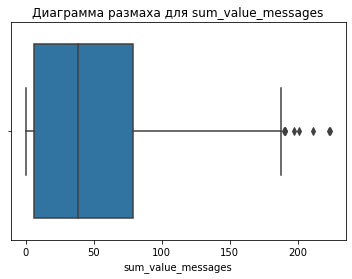

Все что ниже -103.5 Все что выше 188.5 - является выбросом, по определению (справочные данные)
Медиана =  38.0
Среднее =  49.36345177664975
Дисперсия sum_value_messages =  2285.2661425446827
Стандартное отклонение sum_value_messages =  47.804457350174815


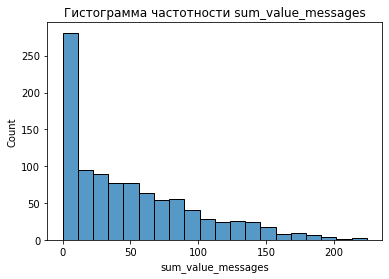

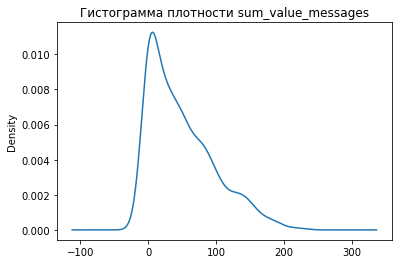

Количество записей за пределами 1 и 3 квартилей
8
      user_id  month  sum_value_messages
183      1028     10                 223
1027     1165     11                 197
1028     1165     12                 224
1035     1167     10                 190
1883     1300     10                 191
3194     1231      6                 201
3195     1231      7                 211
3200     1231     12                 191


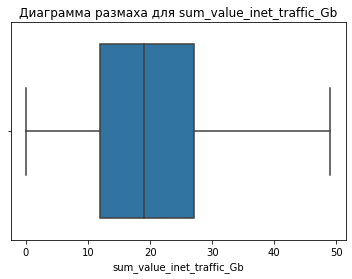

Все что ниже -10.5 Все что выше 49.5 - является выбросом, по определению (справочные данные)
Медиана =  19.0
Среднее =  19.525888324873097
Дисперсия sum_value_inet_traffic_Gb =  97.33494903223153
Стандартное отклонение sum_value_inet_traffic_Gb =  9.865847608403017


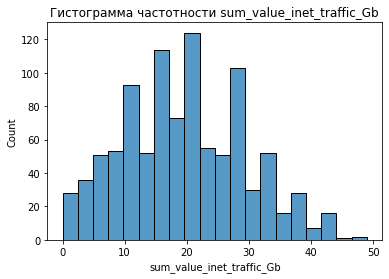

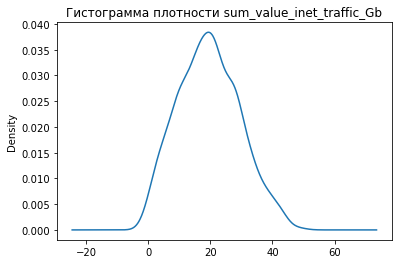

Количество записей за пределами 1 и 3 квартилей
0
Empty DataFrame
Columns: [user_id, month, sum_value_inet_traffic_Gb]
Index: []


In [47]:
users_ultra = fin_df[fin_df['tariff'] == 'ultra']
var_tariff(users_ultra)

Пройдёмся по показателям абонентов тарифного плана Ultra:
1) Звонки
 - Среднестатистический абонент тарифа Ultra использует 545 минут из 3000
 - Данные имеют нормальное распределение
 - Незначительная скошенность вправо
 - По данному показателю, 2 абонента выходят за пределы 1 и 3 квартилей, но не за пределы тарифа, больше 1500 минут никто не проговорил.
 
2) Текстовые сообщения
 - Среднестатистический абонент тарифа Ultra отправляет 50 сообщений из 1000
 - Более 250 сообщений из выборки никто не отправлял
 - Данные имеют распределение Пуассона, скорее всего из-за того что это выборка
 - По данному показателю, 4 абонента выходят за пределы 1 и 3 квартилей, но не за пределы тарифа.
 
3) Интернет трафик
 - Среднестатистический абонент тарифа Ultra использует 20 Гб интернет трафика из 30 Гб
 - Данные имеют нормальное распределение
 - Незначительная скошенность влево
 - Все абоненты находятся в пределах 1 и 3 квартилей, по данному показателю

Итого:
Премиальный тариф Ultra превосходит потребности своих абонентов, нежели Smart, но и платят они абонентской платы почти в 4 раза больше.
Посмотрим кто приносит больший доход компании.

Сводная таблица по статистике

In [48]:
fin_df.pivot_table(index='tariff', values=['sum_duration', 'sum_value_messages', 'sum_value_inet_traffic_Gb'],
                       aggfunc=['mean', 'std', 'var'])

mean                                                       std  \
       sum_duration sum_value_inet_traffic_Gb sum_value_messages sum_duration   
tariff                                                                          
smart    417.934948                 16.359354          33.384029   190.313730   
ultra    526.623350                 19.525888          49.363452   317.606098   

                                                               var  \
       sum_value_inet_traffic_Gb sum_value_messages   sum_duration   
tariff                                                               
smart                   5.758498          28.227876   36219.315784   
ultra                   9.865848          47.804457  100873.633397   

                                                     
       sum_value_inet_traffic_Gb sum_value_messages  
tariff                                               
smart                  33.160304         796.812958  
ultra                  97.334949        2285.266143

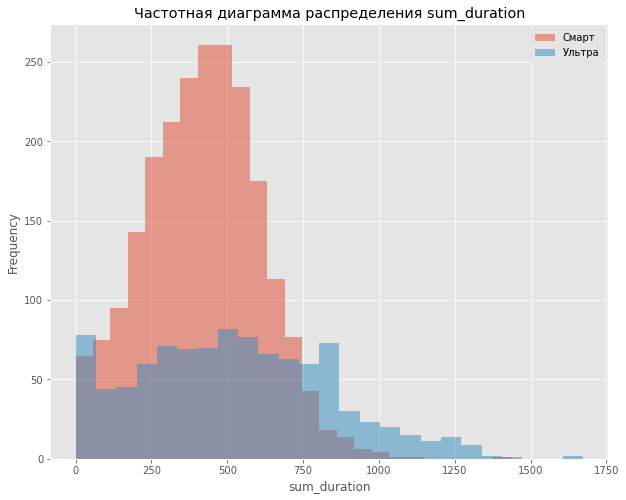

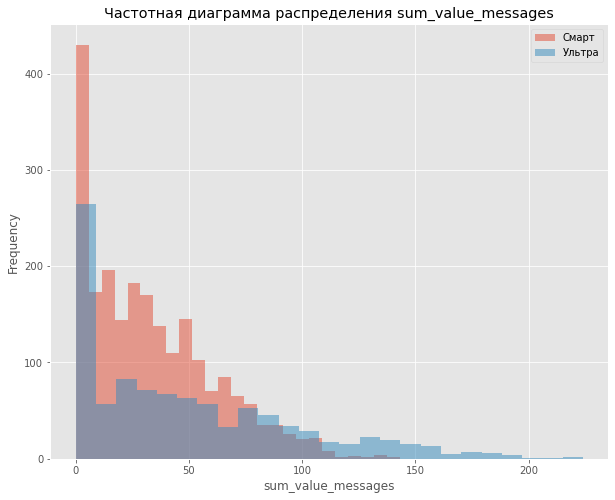

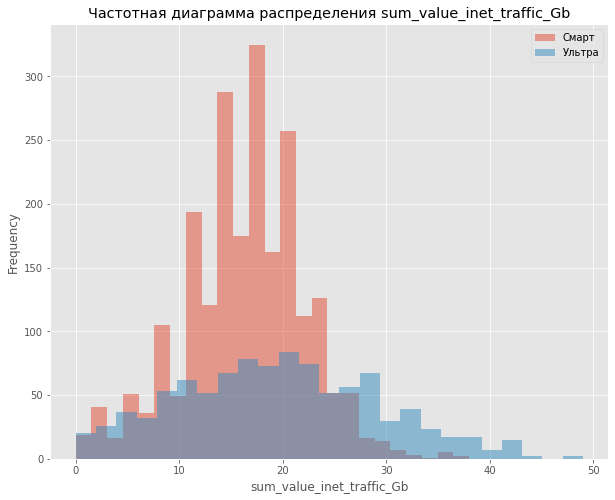

In [49]:
# сравним объемы потребления услуг на разных тарифах

plt.style.use('ggplot')

numeric_col = ['sum_duration', 'sum_value_messages', 'sum_value_inet_traffic_Gb']
for col in numeric_col:
    fin_df.groupby('tariff')[col].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8));
    
        
    plt.legend(['Смарт', 'Ультра'])
    plt.title(f'Частотная диаграмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Распределения потребления услуг на разных тарифах имеют схожие распределения. По СМС сообщениям, на тарифе Ultra, так же как и на тарифе Smart есть всплеск в 0, тенденция к тому, что СМС постепенно уходят в прошлое.

## Проверка гипотез

### Гипотеза №1

 -  Н0 Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы.

In [50]:
# средняя выручка ultra - 149 абонентов
mean_ultra_rev_rub = users_ultra['revenue_rub'].mean()
mean_ultra_rev_rub

2071.0659898477156

In [51]:
# средняя выручка smart - 351
mean_smart_rev_rub = users_smart['revenue_rub'].mean()
mean_smart_rev_rub

1294.6393001345896

In [52]:
alpha = .05# критический уровень статистической значимости

results = st.ttest_ind(users_smart['revenue_rub'], users_ultra['revenue_rub'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Гипотеза №1 не подтвердилась, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Критический уровень значимости 5%. Применяемый метод для сравнения двух выборок. (st.ttest_ind)

### Гипотеза №2.

 - Н0 Средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов

In [53]:
alpha = .05# критический уровень статистической значимости

results = st.ttest_ind(fin_df[fin_df['city'] != 'Москва']['revenue_rub'],
                       fin_df[fin_df['city'] == 'Москва']['revenue_rub'],
                       equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Между средними выручками пользователями из Москвы и других регионов нет статистически значимой разницы. Если разница и есть будем считать ее случайной.

In [54]:
print('Средняя выручка с пользователя из Москвы = ',fin_df[fin_df['city'] == 'Москва']['revenue_rub'].mean())

Средняя выручка с пользователя из Москвы =  1550.8052373158755


In [55]:
print('Средняя выручка с пользователя НЕ из Москвы = ',fin_df[fin_df['city'] != 'Москва']['revenue_rub'].mean())

Средняя выручка с пользователя НЕ из Москвы =  1528.3169419900116


### Дополнительные расчёты

In [56]:
#ultra 149 абонентов
round(mean_ultra_rev_rub * 149)

308589

In [57]:
#smart 351 абонент
round(mean_ultra_rev_rub * 351)

726944

## Общий вывод

Проведён анализ потребления услуг абонентами сотового оператора "МегаЛайн" на тарифах Smart и Ultra.

Если отвечать прямо какой тариф приносит больше денег? Ответ: тариф "Smart".

Рекламная кампания данного продукта даст больше клиентов компании и охватит потребности большого круга клиентов, из данной выборки 70% абонентов выбрали данный тариф.

От рекламы тарифа Ultra отказываться не стоит, это премиум тариф, который так же приносит доход компании, больший охват клиентов, просто это не массовый продукт, поэтому стоит заняться персонализированной рекламой. Предложить уже существующим клиентам с большими потребностями перейти на этот тариф. Разместить рекламу в бизнес центрах, автосалонах марок люкс, в бизнес залах аэропртов.


Так же стоит проанализировать возможность создания, другого тарифного плана. Если взглянуть на потребление интернет трафика, то средний показатель схож на обоих тарифах, при этом текстовыми сообщениями пользуется минимальное количество абонентов. Либо изменение пакетов у существующего, добавление новой услуги безлимитная соц сеть, если потребление текстовых сообщений крайне низкое, то это не говорит, что абоненты стали реже общаться посредством текстовых сообщений, значит они нашли другие каналы связи, как вариант ушли во всемирную сеть.

И второй вопрос, какой тариф лучше. Тут ответа нет, т.к нет лучшего/худшего, они разные и ориентированы на разные слои абонентов.